In [ ]:
# import library ที่สำคัญ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data pre processing

In [ ]:
#load ข้อมูลเข้ามาเก็บใน datafram data
df=pd.read_csv('heart_failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# ดูรูปร่างข้อมูล
df.shape

(299, 13)

In [ ]:
# ดูว่ามีค่า null หรือไม่ ซึ่งในชุดข้อมูลนี้ไม่มี Outliers
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# ดูรายละเอียดข้อมูล 
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Outliers

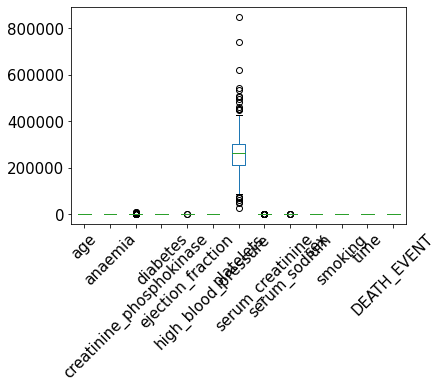

In [ ]:
# ดู Boxplot ของข้อมูล จะเห้นได้ว่ามี outliers อยู่
boxplot = df.boxplot(grid=False, rot=45, fontsize=15)

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
bp_df = df

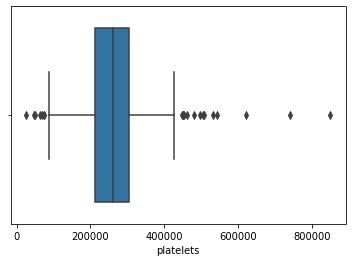

In [12]:
# ดูแยกแต่ละปัจจัย
# ดู Boxplot ของ platelets
sns.boxplot(x='platelets', data=bp_df)

In [13]:
# จะทำการตัด Outliers ด้วยวิธีแบบ IQR
# IQR 
df2 = df
q1 = df2.quantile(0.25) # เลือกค่าที่เป็นจุดของ Q1
q3 = df2.quantile(0.75) # เลือกค่าที่เป็นจุดของ Q3
iqr = q3 - q1
iqr

age                            19.0
anaemia                         1.0
creatinine_phosphokinase      465.5
diabetes                        1.0
ejection_fraction              15.0
high_blood_pressure             1.0
platelets                   91000.0
serum_creatinine                0.5
serum_sodium                    6.0
sex                             1.0
smoking                         1.0
time                          130.0
DEATH_EVENT                     1.0
dtype: float64

In [14]:
# คำนวณหาค่า lower outliers และ upper outliers
low_outlier = q1-1.5*iqr
upp_outlier = q3+1.5*iqr

In [15]:
# แสดงค่า lower outliers
low_outlier

age                            22.50
anaemia                        -1.50
creatinine_phosphokinase     -581.75
diabetes                       -1.50
ejection_fraction               7.50
high_blood_pressure            -1.50
platelets                   76000.00
serum_creatinine                0.15
serum_sodium                  125.00
sex                            -1.50
smoking                        -1.50
time                         -122.00
DEATH_EVENT                    -1.50
dtype: float64

In [16]:
# แสดงค่า upper outliers
upp_outlier

age                             98.50
anaemia                          2.50
creatinine_phosphokinase      1280.25
diabetes                         2.50
ejection_fraction               67.50
high_blood_pressure              2.50
platelets                   440000.00
serum_creatinine                 2.15
serum_sodium                   149.00
sex                              2.50
smoking                          2.50
time                           398.00
DEATH_EVENT                      2.50
dtype: float64

In [17]:
# สร้างคำสั่งสำหรับการกรองข้อมูลให้เหลือเฉพาะตัวที่ไม่เกินขอบเขต Outlier ของ
# ให้ df เป็นชุดข้อมูลที่ต้องการจะ clean outlier 
# df_col เป็น list col ที่ต้องการตัด outlier ออก
def outlier_b(df,df_col):
   for col in df_col:
     df = df.loc[(df[col]>=low_outlier[col])&(df[col]<=upp_outlier[col])]
   return df

In [19]:
list_col = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
list_col

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

In [20]:
# เอาฟังก์ชั่นที่กรองข้อมูลมาใช้ 
clean_data = outlier_b(df2,list_col) #กรองข้อมูลที่ไม่เกิน outlier ใน df2
clean_data # ได้เป็นขนาด 224*13 หายไป 75 ตัว

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


In [24]:
# ดูข้อมูลของข้อมูล
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       224 non-null    float64
 1   anaemia                   224 non-null    int64  
 2   creatinine_phosphokinase  224 non-null    int64  
 3   diabetes                  224 non-null    int64  
 4   ejection_fraction         224 non-null    int64  
 5   high_blood_pressure       224 non-null    int64  
 6   platelets                 224 non-null    float64
 7   serum_creatinine          224 non-null    float64
 8   serum_sodium              224 non-null    int64  
 9   sex                       224 non-null    int64  
 10  smoking                   224 non-null    int64  
 11  time                      224 non-null    int64  
 12  DEATH_EVENT               224 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 24.5 KB


# Split & Normalization data

In [25]:
split_data = clean_data

In [30]:
# ทำการแบ่งข้อมูลก่อนเป็นชุด test(30%) train(70%) 
from sklearn.model_selection  import train_test_split
X = split_data.drop(['DEATH_EVENT'], axis='columns')
y = split_data.DEATH_EVENT # ให้ DEATH_EVENT เป็น target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:
# ทำการ scaling ด้วยวิธี standardization ที่ Input แต่ Output ไม่ต้องทำ
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train) # ทำที่ส่วน Train ก่อนแล้วค่อยประยุกต์ไปใส่ที่ test เพราะเราจะไม่เห็นข้อมูลที่ test ในโลกความเป็นจริง
X_test_norm = sc.transform(X_test) 

In [33]:
X_train_norm

array([[-1.22384001, -0.98726063,  0.89479957, ...,  0.73793933,
        -0.70710678,  0.90010235],
       [ 0.9539434 , -0.98726063,  0.10797749, ...,  0.73793933,
         1.41421356, -0.95383231],
       [ 0.34416405,  1.01290376, -1.01811649, ..., -1.35512495,
        -0.70710678, -1.51523505],
       ...,
       [ 0.43127538,  1.01290376, -0.94593097, ...,  0.73793933,
        -0.70710678, -0.14436788],
       [-0.26561531, -0.98726063,  0.89479957, ...,  0.73793933,
         1.41421356, -0.79716177],
       [-0.70117199,  1.01290376,  1.34595902, ...,  0.73793933,
         1.41421356,  1.00454937]])

In [36]:
X_test_norm

array([[ 1.69941374e-01, -9.87260626e-01, -5.09208629e-01,
        -8.79049073e-01,  1.95356071e+00,  1.26491106e+00,
         5.78686521e-01,  5.47966695e-01,  2.19171065e+00,
         7.37939330e-01,  1.41421356e+00, -3.27150169e-01],
       [-1.39806268e+00, -9.87260626e-01,  8.94799570e-01,
         1.13759292e+00,  3.46653590e-02, -7.90569415e-01,
         6.80406255e-01, -7.26469450e-01,  8.66490255e-01,
        -1.35512495e+00, -7.07106781e-01,  1.46150509e+00],
       [ 9.53943403e-01, -9.87260626e-01, -4.44241669e-01,
        -8.79049073e-01, -1.09922735e+00, -7.90569415e-01,
         2.73527318e-01,  2.29357659e-01, -7.23774213e-01,
        -1.35512495e+00, -7.07106781e-01,  9.78437614e-01],
       [-9.62506001e-01, -9.87260626e-01,  8.94799570e-01,
        -8.79049073e-01,  1.08133555e+00, -7.90569415e-01,
        -1.48477094e+00, -1.68229656e+00, -7.23774213e-01,
        -1.35512495e+00, -7.07106781e-01,  5.21481889e-01],
       [-6.14060655e-01, -9.87260626e-01,  8.9479957

# Without Normalize

In [38]:
from sklearn.decomposition import PCA

# เลือกทำ PCA ที่ X
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
# ดู EigenVector 

df_component = pd.DataFrame(pca.components_)
df_component.columns = X.columns # ใช้ชื่อคอลัมน์ตาม X เพราะเป็นข้อมูลที่ตัด target ไปแล้ว
df_component = df_component.T
df_component.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
df_component

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
age,-1.614416e-05,0.001272,-0.037035,-7.071726e-01,-0.705917,-1.170732e-02,-5.682290e-04,1.431024e-03,-3.203678e-03,-2.089716e-03,4.108766e-03,-6.670001e-03
anaemia,1.235308e-07,-0.000367,-0.000391,-4.092668e-04,-0.002860,-8.225731e-03,-3.229568e-01,-6.396956e-01,1.616615e-01,6.735846e-01,7.989244e-02,1.336964e-02
creatinine_phosphokinase,1.142060e-04,0.999372,-0.034848,-2.256455e-03,0.005911,-1.369588e-03,2.777529e-05,-2.047030e-04,4.406310e-05,3.364209e-04,4.745469e-05,-9.077513e-05
diabetes,-1.026003e-07,0.000003,0.000405,3.521377e-05,0.001494,1.913214e-02,-3.283138e-01,6.370355e-01,-4.226621e-01,5.532028e-01,-2.968402e-02,-2.167010e-02
ejection_fraction,1.459194e-05,-0.005295,0.011343,-7.060393e-01,0.705668,5.746641e-02,6.208776e-03,-3.364518e-03,-5.186950e-04,3.350563e-03,-2.131477e-03,4.060221e-03
high_blood_pressure,6.068960e-07,-0.000032,-0.001504,-3.865983e-03,-0.000352,-2.433995e-03,-1.967892e-01,4.068513e-01,8.821374e-01,8.753807e-02,-7.257233e-02,6.802011e-02
platelets,1.000000e+00,-0.000116,-0.000039,-6.088712e-08,-0.000021,-4.301432e-07,7.570697e-07,7.228664e-09,-6.322152e-07,2.109091e-07,-3.916458e-07,-3.159529e-07
serum_creatinine,-1.622525e-07,0.000140,-0.000554,-1.321339e-03,-0.009685,1.420818e-02,4.169625e-02,-4.299953e-02,-7.722032e-02,2.835625e-02,-4.091721e-01,9.066013e-01
serum_sodium,4.751433e-07,-0.001651,0.002153,-3.238791e-02,0.048785,-9.979230e-01,-3.406201e-03,1.482696e-02,-1.286391e-02,5.051539e-03,-1.432272e-02,9.256868e-03
sex,-9.489329e-07,-0.000093,0.000192,2.465326e-03,-0.005088,4.555777e-03,6.207130e-01,8.627996e-03,7.145084e-02,3.677383e-01,-6.144405e-01,-3.109892e-01


In [43]:
# Variance ratio
df_var = pd.DataFrame(pca.explained_variance_ratio_*100)
df_var.columns = ['Variance']
df_var = df_var.T
df_var.columns = df_var.columns+1
df_var

,1,2,3,4,5,6,7,8,9,10,11,12
Variance,99.998132,0.001733,0.000128,0.000003,0.000003,3.075749e-07,8.008607e-09,5.460765e-09,4.618236e-09,4.497986e-09,2.694034e-09,1.809951e-09


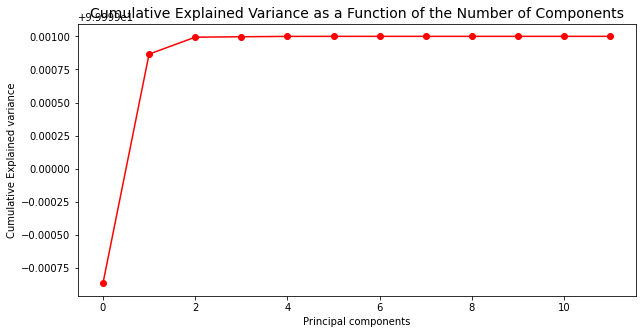

In [44]:
# Plot cummulative variance 
plt.figure(figsize=(10, 5))
plt.title('Cumulative Explained Variance as a Function of the Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
cum_var = np.cumsum(df_var.values)
plt.plot(cum_var, color='r', marker='o')
plt.show()

In [45]:
# ที่ component ที่ 1 ก็จะได้ค่า Variance ประมาณ 99 ส่วนแล้ว

# With Normalization

In [46]:
# เลือกทำ PCA ที่ X_train_norm
pca = PCA()
pca.fit(X_train_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
# ดู EigenVector 

df_component = pd.DataFrame(pca.components_)
df_component.columns = X.columns # ใช้ชื่อคอลัมน์ตาม X เพราะเป็นข้อมูลที่ตัด target ไปแล้ว
df_component = df_component.T
df_component.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
df_component

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
age,0.006760,0.443272,-0.365139,-0.026670,0.460091,-0.226617,0.015890,-0.169974,-0.108851,-0.087504,0.458104,0.384550
anaemia,0.303524,0.051027,-0.005188,-0.527651,0.107432,0.425188,0.140580,-0.311409,-0.260532,0.487920,-0.103454,0.033421
creatinine_phosphokinase,-0.013844,0.219647,0.305765,0.575257,0.264041,-0.157654,0.396014,-0.236595,-0.244739,0.237198,-0.304112,-0.105495
diabetes,0.220733,0.000943,0.386262,-0.279924,-0.206438,-0.503714,-0.170200,-0.519300,-0.045147,-0.296151,-0.131881,0.146968
ejection_fraction,0.213177,-0.273706,-0.378028,0.015265,0.438191,-0.278195,-0.457254,0.052182,-0.173121,0.061666,-0.392365,-0.259943
high_blood_pressure,0.304816,0.257024,-0.324923,0.156712,-0.364303,-0.246659,-0.024375,-0.145701,0.525088,0.449929,0.008652,-0.131464
platelets,0.212514,-0.154503,-0.060771,0.504381,-0.071663,0.500004,-0.385193,-0.408110,0.011473,-0.143984,0.046690,0.282424
serum_creatinine,-0.160063,0.518945,0.054358,-0.148383,0.243220,0.306117,-0.142947,-0.176277,0.369767,-0.338237,-0.265714,-0.392424
serum_sodium,0.202840,-0.357784,-0.370808,-0.034153,0.087076,0.029678,0.641680,-0.203880,0.227588,-0.397926,-0.142214,-0.005640
sex,-0.595320,-0.088465,-0.151698,-0.091547,0.009877,-0.042504,-0.039703,-0.144139,0.219997,0.217185,-0.460756,0.523694


In [48]:
# Variance ratio
df_var = pd.DataFrame(pca.explained_variance_ratio_*100)
df_var.columns = ['Variance']
df_var = df_var.T
df_var.columns = df_var.columns+1
df_var

,1,2,3,4,5,6,7,8,9,10,11,12
Variance,15.203773,14.007827,11.047861,9.872022,9.310931,9.066354,6.92569,6.15242,5.630451,5.196552,4.127672,3.458447


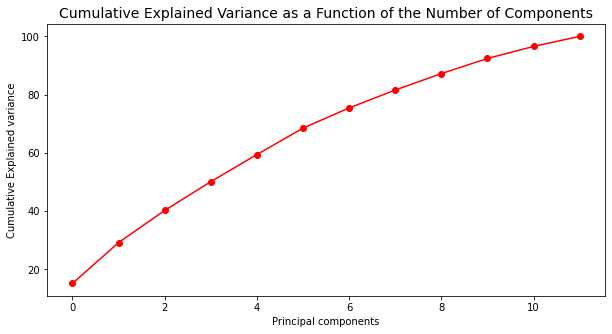

In [49]:
# Plot cummulative variance 
plt.figure(figsize=(10, 5))
plt.title('Cumulative Explained Variance as a Function of the Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
cum_var = np.cumsum(df_var.values)
plt.plot(cum_var, color='r', marker='o')
plt.show()

In [50]:
# แบบว่ามันจะต่างกับตอนไม่ Normalization มากคือตอนยังไม่ทำ Norm จะใช้ 1 component แต่พอทำ Normalization แล้วมันจะต้องใช้ถึง 11 ตังถึงจะได้ 96.541553%

# Summary

การทำ PCA แบบที่ไม่ได้ Normalize เหมือนตัวข้อมูลมันจะดูมีความเกี่ยวข้องกันน้อยทำให้เมื่อแบ่งเป็น Component มันจะมี Var หรือความหลากหลายที่ component ที่ 1 เยอะมากถึง 99.998132 และที่ตัวอื่นก็จะเหลือแค่น้อย ๆ ดังนั้นเราสามารถเลือกใช้แค่ 1 component ได้ แต่ถ้าทำ Normalize แล้วมันจะเหมือนลด weight ลงมา พอมันลดลงมาแล้วมันจะทำให้ตัวข้อมูลในแต่ละ Feature มีความใกล้เคียงกันมากขึ้น คือจะดูเหมือนมีความเกี่ยวพันธ์กันขึ้นมาเลยทำให้ค่า Variance ในแต่ละ Component ลดลง 


ที่ Component 1 จะลดลงจาก 99.98 เป็น 15.20 และรวมใช้ 11 component ถึงจะมีค่า var สะสม มากกว่า 95 

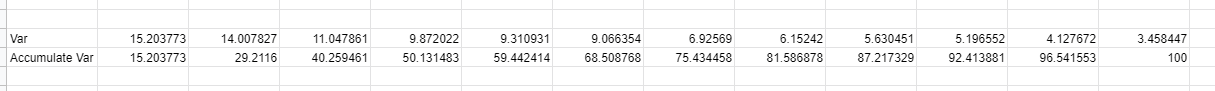

ภาพด้านบนเป็นผลรวมของ Var หลังจากการทำ PCA แบบ Normalize ซึ่งจะเห็นได้ว่าต้องใช้ถึง 11 ตัวถึงจะได้ค่า var รวมมากกว่า 95 ซึ่งแบบนี้คิดว่าการทำ PCA ขึ้นมาเพื่อลดตัวแปร แต่ว่าตอนนี้ก็ใช้ถึง 11 ตัว จากที่ถ้าไม่ทำ PCA ก็ใช้ 12 ตัว คือลดไปแค่ตัวเดียวเลยคิดว่าไม่คุ้มถ้าจะทำ ซึ่งมันเป็นที่ตัวข้อมูลด้วยคือมันไม่ค่อยมีสัดส่วนที่แตกต่างกันมาก